<a href="https://colab.research.google.com/github/nandaeka02/Machine-Learning-and-Deep-Learning_Startup-Campus/blob/main/04_03_Air_Nanda_Eka_Suci_Ramadan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST dataset for the data loader

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Transformasi data (normalisasi dan konversi ke tensor)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Muat dataset MNIST
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Set batch size
batch_size = 64

# Buat data loader untuk pelatihan dan pengujian
train_loader = DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 115793975.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 5146607.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42500484.85it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10678547.52it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Visualize several MNIST datasets

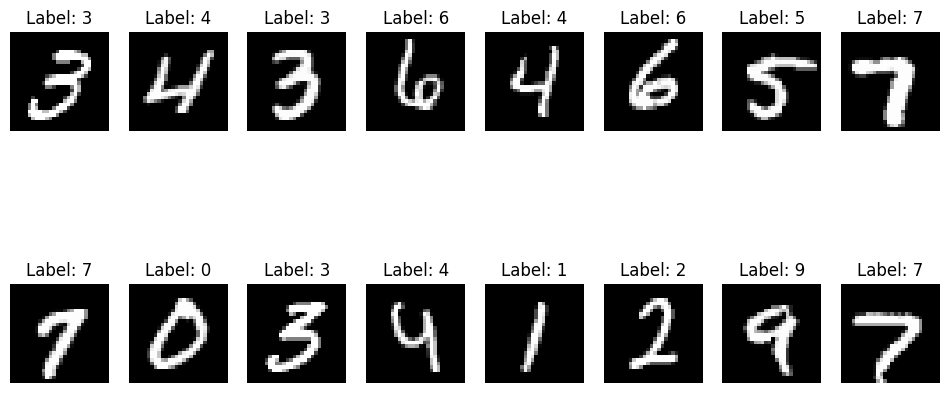

In [ ]:
# Fungsi untuk menampilkan gambar MNIST
def show_images(images, labels, ncols=8):
    nrows = len(images) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows))
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // ncols, i % ncols]
        ax.imshow(image[0], cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

# Ambil beberapa gambar untuk divisualisasikan
sample_images, sample_labels = next(iter(train_loader))
show_images(sample_images[:16], sample_labels[:16])

# Design your Neural Network model

In [ ]:
# Definisi model Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameter
input_size = 28 * 28  # Ukuran input (jumlah fitur)
hidden_size = 128    # Jumlah unit di lapisan tersembunyi
num_classes = 10     # Jumlah kelas (0-9)

# Inisialisasi model
model = NeuralNetwork(input_size, hidden_size, num_classes)

# Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

In [ ]:
# Hyperparameter
learning_rate = 0.001
num_epochs = 10

# Loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Develop a training loop and run a training model

In [ ]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.view(-1, input_size)  # Flatten gambar
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the Model

In [ ]:
# Evaluasi model pada data uji
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, input_size)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Menghitung metrik evaluasi
accuracy = accuracy_score(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)
classification_rep = classification_report(all_labels, all_predictions)

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.3f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.975
Confusion Matrix:
[[ 962    0    7    1    1    1    2    1    3    2]
 [   0 1125    4    2    0    1    1    1    1    0]
 [   3    1 1012    1    1    0    0    8    6    0]
 [   0    0    9  984    0    0    0    5    4    8]
 [   0    0    6    0  949    0   10    6    0   11]
 [   2    1    0   20    0  846    7    2   10    4]
 [   4    3    5    0    3    6  933    1    2    1]
 [   0    4    9    3    0    0    0  999    1   12]
 [   0    0    4    4    4    0    4    2  952    4]
 [   1    2    0    5   10    2    2    3    1  983]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.97      0.97

# Describe and explain



*   **Accuracy**: Dalam eksperimen ini, kita mengukur seberapa baik model kita dalam mengenali angka tulisan tangan di dataset MNIST. Hasilnya adalah sekitar 0.975, yang berarti model kita benar-benar mengenali angka sekitar 97.5% dari waktu.
*   **Confusion Matrix**: Ini adalah tabel yang menunjukkan seberapa baik model kita dalam mengklasifikasikan masing-masing digit. Pada diagonal utama matriks, kita melihat berapa banyak digit yang diklasifikasikan dengan benar. Di luar diagonal utama, kita melihat berapa banyak digit yang salah diklasifikasikan.
*   **Classification Report**: Ini memberikan informasi lebih rinci tentang kinerja model kita untuk setiap kelas digit. Ini mencakup metrik seperti Precision, Recall, dan F1 Score.
```
Accuracy: 0.975
Confusion Matrix:
[[ 962    0    7    1    1    1    2    1    3    2]
 [   0 1125    4    2    0    1    1    1    1    0]
 [   3    1 1012    1    1    0    0    8    6    0]
 [   0    0    9  984    0    0    0    5    4    8]
 [   0    0    6    0  949    0   10    6    0   11]
 [   2    1    0   20    0  846    7    2   10    4]
 [   4    3    5    0    3    6  933    1    2    1]
 [   0    4    9    3    0    0    0  999    1   12]
 [   0    0    4    4    4    0    4    2  952    4]
 [   1    2    0    5   10    2    2    3    1  983]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
```

Secara umum, hasilnya menunjukkan bahwa model kita cukup baik dalam mengenali digit tulisan tangan dalam dataset MNIST. Namun, kita juga bisa melihat dari matriks kebingungannya bahwa ada beberapa angka yang kadang-kadang salah diklasifikasikan, dan laporan klasifikasinya memberikan wawasan lebih lanjut tentang kinerja model kita pada setiap angka.